In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Loading data

In [3]:
train=pd.read_csv("Housetrain.csv")
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test=pd.read_csv("Housetest.csv")
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


# Understanding data

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [7]:
train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [8]:
test.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [9]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [10]:
test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


# Data visualisation and Feature selection

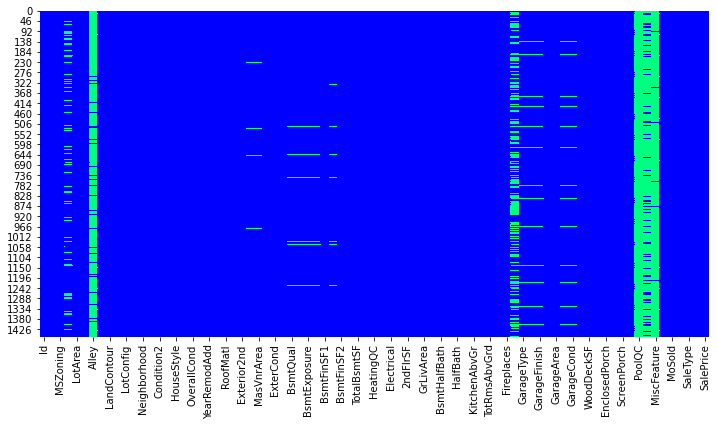

In [11]:
#Representing null values in train data
fig, ax=plt.subplots(figsize=(12,6))
sns.heatmap(train.isnull(), cbar = False, cmap = 'winter')

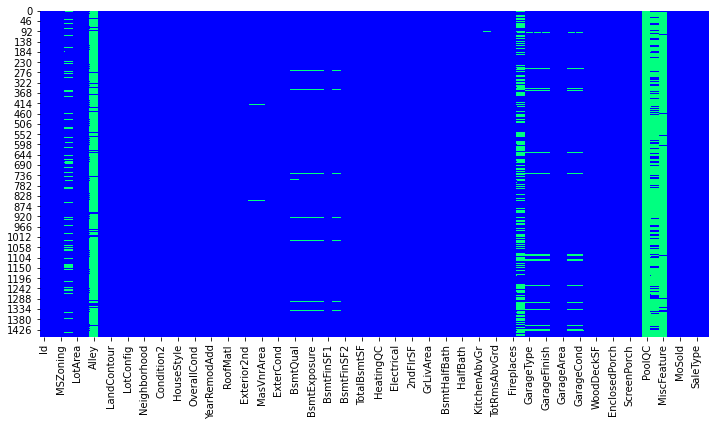

In [12]:
#Representing null values in test data
fig, ax=plt.subplots(figsize=(12,6))
sns.heatmap(test.isnull(), cbar = False, cmap = 'winter')

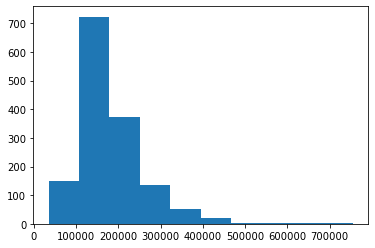

In [13]:
#Skew nature
plt.hist(train.SalePrice)
plt.show()

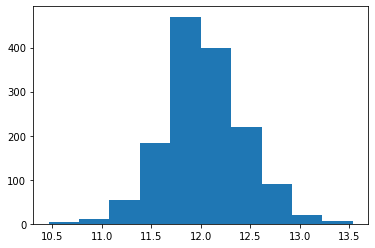

In [14]:
#After taking log
train["Skew"]=np.log(train["SalePrice"]+1)
plt.hist(train.Skew)
plt.show()

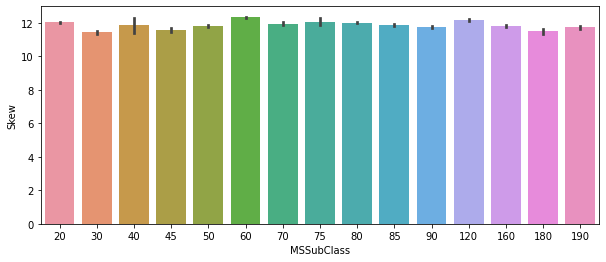

In [15]:
fig,ax=plt.subplots(figsize=(10,4))
sns.barplot(x='MSSubClass',y='Skew',data=train)

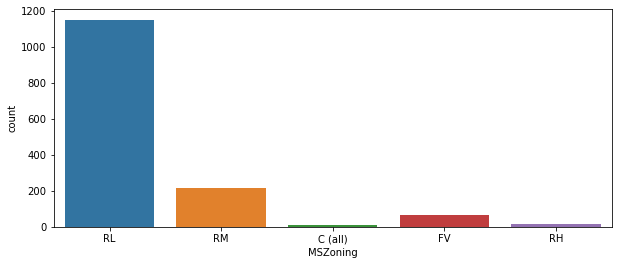

In [16]:
fig,ax=plt.subplots(1,1,figsize=(10,4))
sns.countplot('MSZoning',data=train)

In [17]:
train.OverallQual.unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2], dtype=int64)

In [18]:
#Creating pivot table for OverallQual with SalePrice
pivot=train.pivot_table(index='OverallQual',values='SalePrice',aggfunc=np.median)
pivot

,SalePrice
OverallQual,
1,50150
2,60000
3,86250
4,108000
5,133000
6,160000
7,200141
8,269750
9,345000


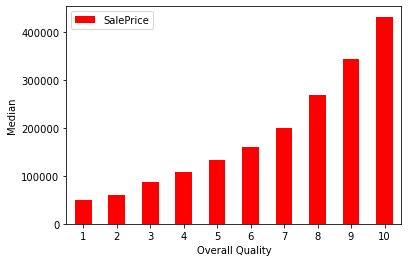

In [19]:
pivot.plot(kind='bar',color='red')
plt.xlabel("Overall Quality")
plt.ylabel("Median")
plt.xticks(rotation=0)
plt.show()

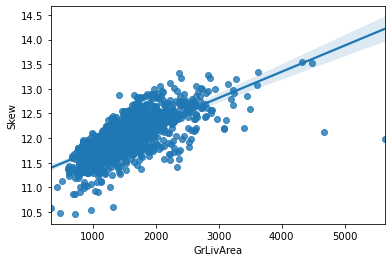

In [20]:
sns.regplot(x='GrLivArea',y='Skew',data=train)

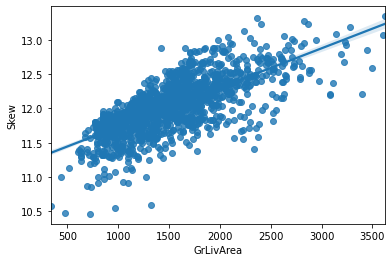

In [21]:
#Remove outliers
train=train[train.GrLivArea<4000]
sns.regplot(x='GrLivArea',y='Skew',data=train)

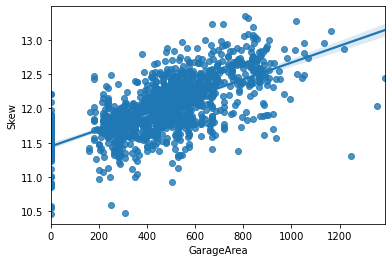

In [22]:
sns.regplot(x='GarageArea',y='Skew',data=train)

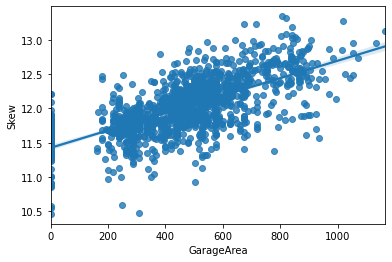

In [23]:
#Remove Outliers
train=train[train.GarageArea<1200]
sns.regplot(x='GarageArea',y='Skew',data=train)

In [24]:
# Removal of null values
null=pd.DataFrame(train.isnull().sum().sort_values(ascending=False)[:30])
null.columns=["Count Null"]
null.index.name='Feature'
null

,Count Null
Feature,
PoolQC,1447
MiscFeature,1399
Alley,1361
Fence,1172
FireplaceQu,689
LotFrontage,258
GarageQual,81
GarageCond,81
GarageFinish,81


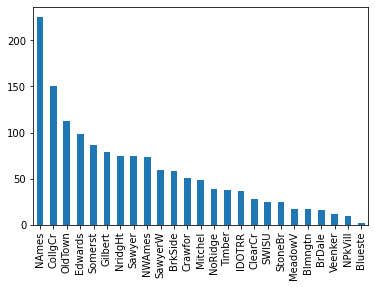

In [25]:
train.Neighborhood.value_counts().plot(kind="bar")

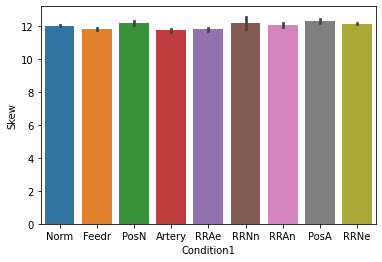

In [26]:
sns.barplot(x="Condition1",y="Skew",data=train)

In [28]:
from sklearn import preprocessing
train.enc_street=pd.get_dummies(train.Street,drop_first=True)
test.enc_street=pd.get_dummies(train.Street,drop_first=True)

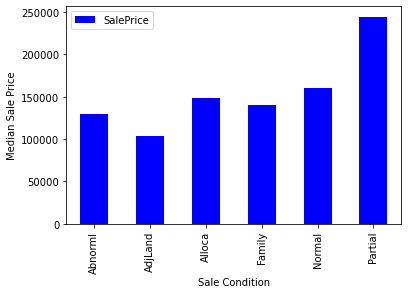

In [29]:
pivot1=train.pivot_table(index="SaleCondition",values="SalePrice",aggfunc=np.median)
pivot1.plot(kind="bar",color="blue")
plt.xlabel("Sale Condition")
plt.ylabel("Median Sale Price")
plt.show()

In [30]:
def transform(x):
    if x=="Partial":
        return 1
    else:
        return 0
train["enc_cond"]=train.SaleCondition.apply(transform)
test["enc_cond"]=test.SaleCondition.apply(transform)

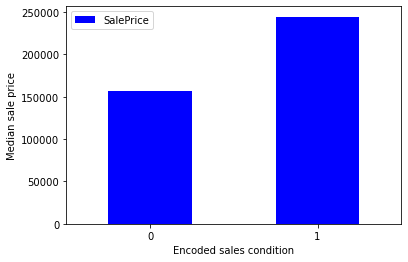

In [31]:
pivot2=train.pivot_table(index="enc_cond",values="SalePrice",aggfunc=np.median)
pivot2.plot(kind="bar",color="blue")
plt.xlabel("Encoded sales condition")
plt.ylabel("Median sale price")
plt.xticks(rotation=0)
plt.show()

In [32]:
#Interpolation of data
df=train.select_dtypes(include=[np.number]).interpolate().dropna()

In [33]:
df.isnull().sum()

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
Skew             0
enc_cond         0
dtype: int64

# Building Model by Linear Regression

In [34]:
X=df.drop(["Skew","Id"],axis=1)
y=df.Skew

In [35]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [36]:
X_train.shape,y_train.shape

((1161, 38), (1161,))

In [37]:
X_test.shape,y_test.shape

((291, 38), (291,))

In [38]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
y_predict=model.predict(X_test)

In [40]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
score=r2_score(y_test,y_predict)
mae=mean_absolute_error(y_test,y_predict)
mse=mean_squared_error(y_test,y_predict)
print("R2 Score:", score)
print("MAE:", mae)
print("MSE", mse)

R2 Score: 0.9532050323789513
MAE: 0.05643661089076952
MSE 0.007986967870454739


Text(0.5, 1.0, 'Linear Regression model')

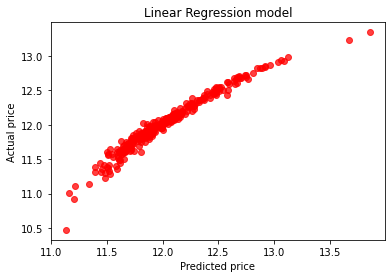

In [41]:
plt.scatter(y_predict,y_test,alpha=0.75,color='r')
plt.xlabel("Predicted price")
plt.ylabel("Actual price")
plt.title("Linear Regression model")

# Building model by Threshold value 

In [42]:
cor=df.corr()
cor

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,Skew,enc_cond
Id,1.000000,0.009027,-0.021736,-0.040258,-0.030272,0.015160,-0.013053,-0.021757,-0.054850,-0.019312,...,0.003787,-0.046432,0.002003,0.040969,-0.006650,0.024040,0.001375,-0.026935,-0.019697,-0.022169
MSSubClass,0.009027,1.000000,-0.369286,-0.147171,0.037649,-0.057780,0.029499,0.042378,0.025427,-0.078940,...,-0.011827,-0.043920,-0.025944,0.008020,-0.007160,-0.010331,-0.019414,-0.086856,-0.074557,-0.047844
LotFrontage,-0.021736,-0.369286,1.000000,0.248396,0.197512,-0.044043,0.100465,0.065255,0.130685,0.109839,...,0.000789,0.058748,0.045066,0.047771,-0.012975,0.026738,0.010912,0.311838,0.317653,0.089116
LotArea,-0.040258,-0.147171,0.248396,1.000000,0.091896,0.000330,0.007211,0.008054,0.080123,0.171787,...,-0.015232,0.021844,0.046402,0.034091,0.038912,0.008717,-0.012355,0.271277,0.260371,0.003564
OverallQual,-0.030272,0.037649,0.197512,0.091896,1.000000,-0.093566,0.570313,0.548916,0.391939,0.210955,...,-0.112993,0.031851,0.068239,0.018250,-0.029482,0.076246,-0.026043,0.800028,0.818714,0.311447
OverallCond,0.015160,-0.057780,-0.044043,0.000330,-0.093566,1.000000,-0.377494,0.073676,-0.129213,-0.041509,...,0.069265,0.025149,0.053986,0.007937,0.069729,-0.003562,0.043743,-0.080717,-0.037628,-0.150139
YearBuilt,-0.013053,0.029499,0.100465,0.007211,0.570313,-0.377494,1.000000,0.590570,0.309758,0.247860,...,-0.387349,0.031836,-0.049621,-0.014360,-0.033276,0.013717,-0.013506,0.533804,0.587569,0.339167
YearRemodAdd,-0.021757,0.042378,0.065255,0.008054,0.548916,0.073676,0.590570,1.000000,0.171435,0.120489,...,-0.193730,0.045697,-0.038231,-0.009504,-0.008806,0.022601,0.035819,0.519809,0.567250,0.318117
MasVnrArea,-0.054850,0.025427,0.130685,0.080123,0.391939,-0.129213,0.309758,0.171435,1.000000,0.229088,...,-0.108206,0.020831,0.066691,-0.015884,-0.029071,0.001861,-0.004220,0.471281,0.424502,0.140822
BsmtFinSF1,-0.019312,-0.078940,0.109839,0.171787,0.210955,-0.041509,0.247860,0.120489,0.229088,1.000000,...,-0.102916,0.030207,0.070795,0.016549,0.006110,0.000750,0.019763,0.393781,0.380918,0.008666


In [43]:
cor.index.values

array(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice', 'Skew', 'enc_cond'], dtype=object)

In [44]:
def getCorrelatedFeature(corrdata, threshold):
    feature=[]
    value=[]
    for i, index in enumerate(cor.index):
        if abs(corrdata[index])>threshold:
            feature.append(index)
            value.append(corrdata[index])
    df=pd.DataFrame(data=value,index=feature,columns=['Corr Value'])
    return df

In [45]:
threshold=0.65
corr_value=getCorrelatedFeature(cor['Skew'],threshold)
corr_value

,Corr Value
OverallQual,0.818714
GrLivArea,0.718031
GarageCars,0.684962
GarageArea,0.667847
SalePrice,0.954533
Skew,1.000000


In [46]:
corr_value.index.values

array(['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'SalePrice', 'Skew'], dtype=object)

In [47]:
data=df[corr_value.index]
data.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,SalePrice,Skew
0,7,1710,2,548,208500,12.247699
1,6,1262,2,460,181500,12.109016
2,7,1786,2,608,223500,12.317171
3,7,1717,3,642,140000,11.849405
4,8,2198,3,836,250000,12.429220


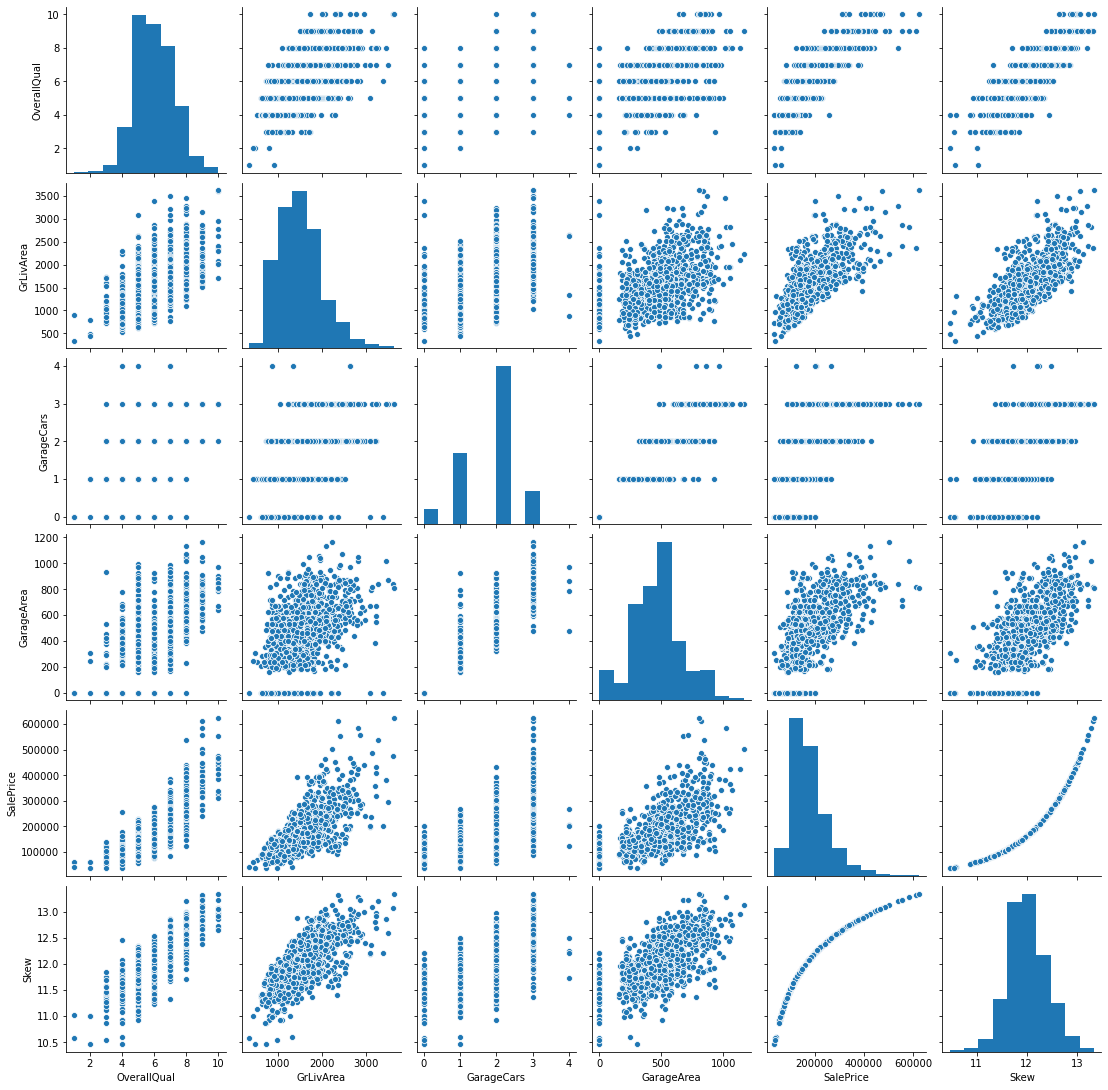

In [48]:
sns.pairplot(data)

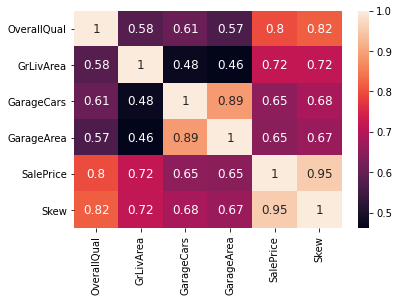

In [49]:
sns.heatmap(data.corr(),annot=True,annot_kws={'size':12})

In [50]:
X1=data.drop('Skew',axis=1)
y1=data.Skew

In [51]:
X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,test_size=0.2,random_state=0)

In [52]:
X1_train.shape,X1_test.shape

((1161, 5), (291, 5))

In [53]:
y1_train.shape,y1_test.shape

((1161,), (291,))

In [54]:
model1=LinearRegression()
model1.fit(X1_train,y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [55]:
y_pred=model1.predict(X1_test)

In [56]:
score=r2_score(y1_test,y_pred)
mae=mean_absolute_error(y1_test,y_pred)
mse=mean_squared_error(y1_test,y_pred)
print("R2 Score:", score)
print("MAE:", mae)
print("MSE", mse)

R2 Score: 0.9246913698987478
MAE: 0.07466255211249774
MSE 0.012853681486812468


# Building Model by Recursive Feature Elimination

In [57]:
from sklearn.feature_selection import RFE
df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,Skew,enc_cond
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,0,0,2,2008,208500,12.247699,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,0,0,5,2007,181500,12.109016,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,0,0,9,2008,223500,12.317171,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,272,0,0,0,0,2,2006,140000,11.849405,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,0,0,12,2008,250000,12.429220,0


In [80]:
model=LinearRegression()
rfe=RFE(model,10,verbose=1)
rfe=rfe.fit(X,y)

Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 fe

In [81]:
X.shape

(1452, 38)

In [82]:
rfe.support_

array([False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
        True,  True, False,  True,  True,  True, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False,  True])

In [83]:
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,enc_cond
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,61,0,0,0,0,0,2,2008,208500,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,0,0,0,5,2007,181500,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,42,0,0,0,0,0,9,2008,223500,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,35,272,0,0,0,0,2,2006,140000,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,84,0,0,0,0,0,12,2008,250000,0


In [84]:
XX=X[X.columns[rfe.support_]]

In [85]:
XX.head()

,OverallQual,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,enc_cond
0,7,1,0,2,1,1,8,0,2,0
1,6,0,1,2,0,1,6,1,2,0
2,7,1,0,2,1,1,6,1,2,0
3,7,1,0,1,0,1,7,1,3,0
4,8,1,0,2,1,1,9,1,3,0


In [86]:
X2_train,X2_test,y2_train,y2_test=train_test_split(XX,y,test_size=0.2,random_state=0)

In [87]:
X2_train.shape,y2_train.shape

((1161, 10), (1161,))

In [88]:
model2=LinearRegression()
model2.fit(X2_train,y2_train)
y1_pred=model2.predict(X2_test)

In [89]:
score=r2_score(y2_test,y1_pred)
mae=mean_absolute_error(y2_test,y1_pred)
mse=mean_squared_error(y2_test,y1_pred)
print("r2_score is ",score)
print("mean absolute error is ",mae)
print("mean squared error is ",mse)

r2_score is  0.846434498880719
mean absolute error is  0.12412841085819262
mean squared error is  0.02621056890951411
